# Hometask

In [207]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.dummy import  DummyClassifier
from sklearn.metrics import confusion_matrix

### Task 1

Use dummy classifier as baseline to evaluate your model

In [208]:
X, y = load_iris(return_X_y=True)
y[y != 1] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020)
print(f"X_train.shape - {X_train.shape}")
print(f"y_train.shape - {y_train.shape}")
print(f"X_test.shape - {X_test.shape}")
print(f"y_test.shape - {y_test.shape}")

dcf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print(f"Train score = {dcf.score(X_train, y_train)}")
print(f"Test score = {dcf.score(X_test, y_test)}")



X_train.shape - (112, 4)
y_train.shape - (112,)
X_test.shape - (38, 4)
y_test.shape - (38,)
Train score = 0.6517857142857143
Test score = 0.7105263157894737


### Task 2. Confusion Matrix.

In [209]:
# ->  *10
# I hope it is was a hometask

y_dcf = dcf.predict(X_test)
confusion = confusion_matrix(y_test, y_dcf)
print(confusion)


[[27  0]
 [11  0]]


### Task 3? 

In [210]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [211]:
# ->  *24

y_predicted = dcf.predict(X_test)
print (confusion_matrix(y_test, y_predicted))
print (classification_report(y_test, y_predicted, target_names=['Negative', 'Positive']))

[[27  0]
 [11  0]]
              precision    recall  f1-score   support

    Negative       0.71      1.00      0.83        27
    Positive       0.00      0.00      0.00        11

    accuracy                           0.71        38
   macro avg       0.36      0.50      0.42        38
weighted avg       0.50      0.71      0.59        38



e:\VScode-projects\my_dskemp\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\VScode-projects\my_dskemp\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\VScode-projects\my_dskemp\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 4?


In [212]:
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score, plot_precision_recall_curve

In [213]:
iris = load_iris()
X = iris.data
y = iris.target

random_state = np.random.RandomState(2020)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2], test_size=.5, random_state=random_state)

svm_model = SVC(kernel="linear", random_state=random_state)
svm_model.fit(X_train, y_train)
y_score = svm_model.decision_function(X_test)

In [214]:
average_precision = average_precision_score(y_test, y_score)
print(f'Average precision-recall score: {round(average_precision, 2)}')

Average precision-recall score: 0.82


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

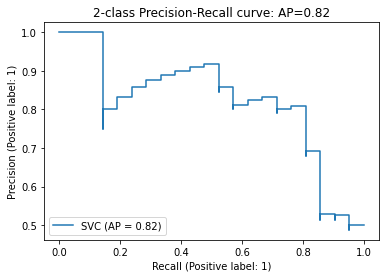

In [215]:
plot = plot_precision_recall_curve(svm_model, X_test, y_test)
plot.ax_.set_title(f'2-class Precision-Recall curve: AP={round(average_precision, 2)}')

### Task 5?

In [216]:
from sklearn.metrics import roc_curve, auc

roc_auc = 0.851


Text(0.5, 1.0, 'ROC curve')

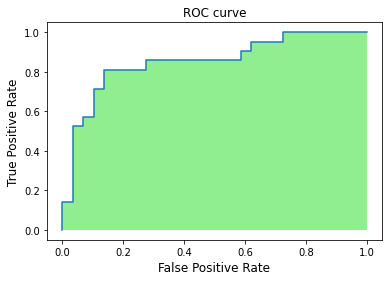

In [217]:
y_score = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)
print (f'roc_auc = {round(roc_auc, 3)}')

plt.figure()
plt.plot(fpr, tpr, '-', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.fill_between(fpr, 0, tpr, facecolor='lightgreen')
plt.title ('ROC curve')

### Task 6?


In [218]:
from sklearn.metrics import roc_auc_score
y_score= svm_model.decision_function(X_test)
print('AUC: ', roc_auc_score(y_test, y_score)) 

AUC:  0.8505747126436781


### Task 7?

In [219]:
from sklearn.metrics import plot_confusion_matrix

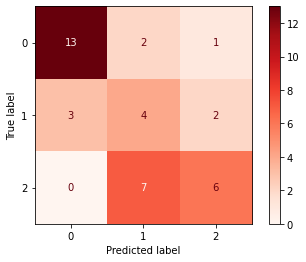

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

svm_model = SVC(kernel="linear").fit(X_train, y_train)
y_predicted = svm_model.predict(X_test)

plot = plot_confusion_matrix(svm_model, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

### Task 8?

In [233]:
print(f"Micro-averaged precision = {precision_score(y_test, y_predicted, average = 'micro')} (treat instances equally)")
print(f"Macro-averaged precision = {precision_score(y_test, y_predicted, average = 'macro')} (treat classes equally)")

Micro-averaged precision = 0.6052631578947368 (treat instances equally)
Macro-averaged precision = 0.5956196581196581 (treat classes equally)


In [222]:
print(f"Micro-averaged f1 = {f1_score(y_test, y_predicted, average = 'micro')} (treat instances equally)")
print(f"Macro-averaged f1 = {f1_score(y_test, y_predicted, average = 'macro')} (treat classes equally)")

Micro-averaged f1 = 0.5263157894736842 (treat instances equally)
Macro-averaged f1 = 0.5378894130647286 (treat classes equally)
